# OLS Multivariable Regression

* Written by: Francis (Frank) Mawulom
* Scheduled project presentation date/time: (05/08/19 presentation)
* Blog post URL:


# 2014 - 2015 King County House Sales Data

In this project, we will analyze Sales data for homes in King County, Oregon (Seattle area)

We want to evaluate the data to see the effect of different variables on the price at which houses sold during this period.  We want to gather this information both for investment purposes and for individual home owners seeking the best course of action with their respective properties.

In doing so, we will implement a Linear Regression Model (or a few) as well as Multiple Regression, and train and test our models on the dataset.

Precisely, we will clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.

We want to gain insights on the following:

 - What is the relationship between the sq footage of living space and the Sale Price as related to homes in a given zipcode
 
 - Are waterfront homes more desirable?  How do sale prices and other variables reflect that?
 
 - What effect does recent renovation have on the sale price of a home.  Is renovation an advantage as related to neighboring homes? How does the year the house was built fit in the equation?
 
 - How competitive are homes with no basement?  Is a larger basement an indication of a more valuable home?  What about a big lot
 
 - Are 'condition', 'grade', and 'price' telling the same story assuming all other variables are constant?

# __Project Outline:__
   #### 1. Data fetching and initial EDA
   #### 2. Data cleaning/munging/wrangling
   #### 3. Exploratory Data Analysys
   #### 4. Baseline Regression Models (Linear, Multiple)
   #### 5. Model Testing/Training
   #### 6. Model Validation
   #### 7. Conclusion: Visualizations


In [43]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import plotly.plotly as py
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

plt.style.use('bmh')
%matplotlib inline

# 1. Data fetching and initial EDA


     
         
         

> let's take a good look at the raw data

In [44]:
# load data
df = pd.read_csv('kc_house_data.csv')
#df.head()
df.tail(100)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21497,1023059465,5/13/2014,505000.0,4,2.50,2790,5602,2.0,0.0,0.0,...,8,2790,0.0,2009,NaN,98059,47.4959,-122.150,2790,5309
21498,3262300818,2/27/2015,1870000.0,4,3.75,3790,8797,2.0,0.0,0.0,...,11,3290,500.0,2006,NaN,98039,47.6351,-122.236,2660,12150
21499,2937300040,12/15/2014,942990.0,4,2.50,3570,6218,2.0,0.0,0.0,...,9,3570,0.0,2014,0.0,98052,47.7046,-122.123,3230,5972
21500,2768100206,10/1/2014,440000.0,3,2.25,1230,1097,3.0,0.0,0.0,...,8,1230,0.0,2009,0.0,98107,47.6697,-122.372,1420,1437
21501,7904700134,6/26/2014,390000.0,3,3.25,1370,913,2.0,0.0,0.0,...,8,1100,270.0,2006,NaN,98116,47.5636,-122.388,1370,915
21502,9521100867,7/11/2014,475000.0,3,3.25,1380,1121,3.0,NaN,0.0,...,8,1380,0.0,2008,NaN,98103,47.6617,-122.349,1310,1405
21503,1702901618,4/7/2015,420000.0,1,2.00,1070,675,2.0,NaN,0.0,...,8,880,190.0,2007,0.0,98118,47.5574,-122.284,1220,788
21504,7237550100,8/25/2014,1410000.0,4,4.00,4920,50621,2.0,0.0,0.0,...,10,4280,640.0,2012,0.0,98053,47.6575,-122.006,4920,74052
21505,7430500110,12/9/2014,1380000.0,5,3.50,5150,12230,2.0,0.0,2.0,...,10,3700,1450.0,2007,0.0,98008,47.6249,-122.090,2940,13462
21506,603000555,3/2/2015,462500.0,6,3.00,2390,4000,2.0,0.0,0.0,...,7,2390,0.0,2014,0.0,98118,47.5173,-122.286,1680,5000


In [3]:
# inspect data
#df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [57]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [58]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## The Prediction Target

By quickly inspecting the data, we can see that the 'price' column is the prediction target, and all other columns are the variables available for prediction

> Let's further explore the price column and visualize it's distribution

In [59]:
# get stats on Price colummn
print(df['price'].describe())

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


> On average, our homes sell for USD 540,296.60
* The highest-selling house went for USD 7.7M
* The lowerst-selling house went for UDS 78,000

    - let's see how square footage of living space and sales price relate for homes in a give zipcode

In [60]:
df[['price', 'sqft_living','zipcode']].loc[df["zipcode"]== 98178]

,price,sqft_living,zipcode
0,221900.0,1180,98178
117,205425.0,880,98178
126,445000.0,2100,98178
273,236000.0,1300,98178
281,170000.0,860,98178
339,245000.0,1740,98178
345,165000.0,1000,98178
346,239900.0,1000,98178
414,339000.0,2390,98178
470,290900.0,1610,98178


> To the naked eye, sale price and square footage of living space seem to be directly correlated
    - let's further explore correlation

In [61]:
corr = df.corr()
abs(corr).sort_values(by = 'price',  ascending= False)['price']

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
id               0.016772
Name: price, dtype: float64

> We can see that there seems to be a correlation between sale price and square footage of living space for houses in a given zipcode (note that we haven't yet cleaned out data or removed outliers)
    - Now let's visualize the distribution of Sale Price over the entire dataset

/Users/Frankie/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



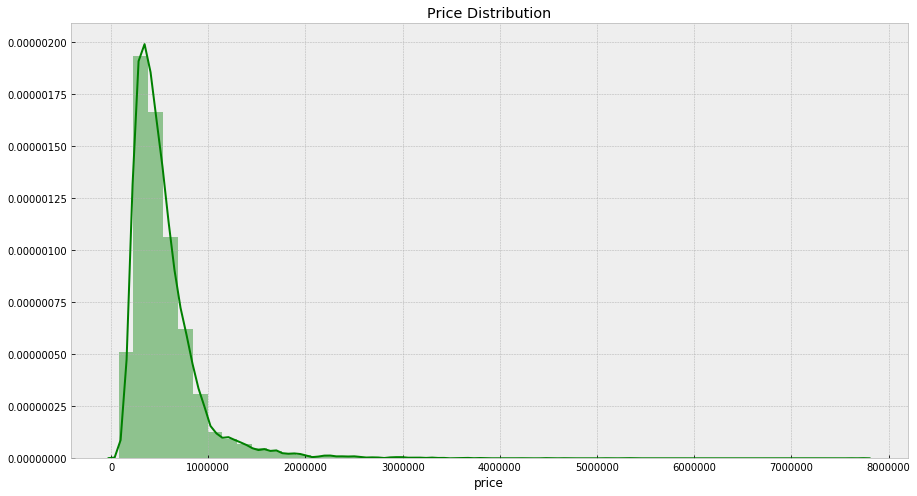

In [62]:
plt.figure(figsize=(15, 8))
plt.title('Price Distribution')
sns.distplot(df['price'], color='g', bins=50, hist_kws={'alpha': 0.4});
# warnings.simplefilter(action='ignore', category=FutureWarning)

> We can see that our prices are skewed right, and the majority of our houses are sold within the 0-1M range

> most of which sold roughly between 200K and 700K

> with some outliers in the 1M-2M range

> and extreme outliers between 2M-7.7M

    - We may want to keep these outliers, however as they do remain linear with independent variables 
    and are still good indicators of the target variable (`price`).

> We will now do some quick Exploratary Data Analysis on variable columns

In [45]:
# let's see how our columns look, remember we have a total of 21597 rows
df.apply(lambda x: sum(x.isnull()), axis=0)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We have to be careful not to read this litirally and make wrong assumptions about the data.  The dataset (as is) says that most columns are fully populated with valid data yet we know that most houses have not been renovated, or viewed, or are on the waterfront... by calling df.head(100) and taking a glimpse, we see that 0.0 if often used as a placeholder, and we even see some '?'s pop up where there should be values.

    - We will tackle this in a moment by setting all columns to their appropriate d.types 
    and setting 0 values to NaN unless they represent a boolean value or are a valid part of the metric

In [64]:
# let's further analyse our columns
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

> Let's take a look at renovation data

In [65]:
df['yr_renovated'].count()

17755

In [66]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [93]:
df['yr_renovated'].value_counts

<bound method IndexOpsMixin.value_counts of 0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
5           0.0
6           0.0
7           0.0
8           0.0
9           0.0
10          0.0
11          0.0
12          NaN
13          0.0
14          0.0
15          0.0
16          0.0
17          0.0
18          0.0
19          0.0
20          0.0
21          0.0
22          0.0
23          NaN
24          0.0
25          0.0
26          NaN
27          0.0
28          NaN
29          0.0
          ...  
21567       0.0
21568       0.0
21569       0.0
21570       0.0
21571       0.0
21572       0.0
21573       0.0
21574       0.0
21575       NaN
21576       NaN
21577       NaN
21578       0.0
21579       NaN
21580       0.0
21581       NaN
21582       0.0
21583       NaN
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590       0.0
21591       0.0
21592       0.0
21593       0.0
21594       0.0
21595       

In [67]:
df['id'][df.yr_renovated.notnull() & df.yr_renovated != 0.].count()

744

We can see here that out of the 17755 entries, 0. has been used as a placeholder for the majority of the values.
We'd like to replace these with NaN to make things easier for ourselves.

    - We'll take care of this shortly, for now let's further examine columns 
    
We can also see that only 744 homes have actually been renovated.  We'll use this subset of data 
to get a more accurate representation of Sale Price's correlation to recent renovation in our future model



In [68]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [69]:
# df.waterfront.unique()
df.id[df['waterfront'] == 1.].count()

146

> only 146 of our 21597 properties are waterfront properties

> we'll use this subset against the overall dataset to determine it's effect on Sale Price

> Let's take a look at basement data

In [70]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


> We can see that 'sqft_basement' and 'sqft_above' add up to 'sqft_living'

In [71]:
df.id[df['sqft_basement'] == '0.0'].count()

12826

In [23]:
# get stats on 'sqft_basement' colummn
df['sqft_basement'].describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

> We'll change this column's dtype to int64 later on and further explore

> Now let's explore 'condition' and 'grade' and how they seem relate to price

In [73]:
sorted(df.condition.unique())

[1, 2, 3, 4, 5]

In [74]:
sorted(df.grade.unique())

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [75]:
df[['condition', 'grade', 'price']].describe()

,condition,grade,price
count,21597.000000,21597.000000,2.159700e+04
mean,3.409825,7.657915,5.402966e+05
std,0.650546,1.173200,3.673681e+05
min,1.000000,3.000000,7.800000e+04
25%,3.000000,7.000000,3.220000e+05
50%,3.000000,7.000000,4.500000e+05
75%,4.000000,8.000000,6.450000e+05
max,5.000000,13.000000,7.700000e+06


> The data seems to be normally distributed as mean values fall right at the midpoint of the rubrics for 'grade' and 'condition' (consider 0,1,2), and those homes sell at the "average price"

     we will later remove any possible outliers from these columns 

In [76]:
df[['condition', 'grade', 'price']][df['price'] > 500000]

,condition,grade,price
1,3,7,538000.0
3,5,7,604000.0
4,3,8,510000.0
5,3,11,1230000.0
10,3,8,662500.0
14,3,7,530000.0
15,3,9,650000.0
21,3,9,2000000.0
26,3,8,937000.0
27,5,8,667000.0


> no homes in bad condition or with a low grade seem to sell over average value

# 2. Data cleaning/munging/wrangling

> now let's get the data in the formats we need it to be in, and clean our values a bit

In [46]:
# change date column to Pandas date format & reformat it to mm/dd/yyyy
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.strftime('%m-%d-%Y')

In [47]:
# replace '?' with NaN
df = df.applymap(lambda x: np.nan if x == '?' else x)

In [48]:
# for typecasting purposes
# NaN => 0 (yr_renovated)
# NaN => 3 (waterfront), we will later convert this back to NaN
# NaN => 999999 (sqft_basement), we will later convert this back to NaN
# NaN => 999 (view), we will later convert this back to NaN


df.yr_renovated.fillna(0, inplace=True)
df.waterfront.fillna(3, inplace=True)
df.sqft_basement.fillna(999999, inplace=True)
df.view.fillna(999, inplace=True)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10-13-2014,221900.0,3,1.00,1180,5650,1.0,3.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12-09-2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,02-25-2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12-09-2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,02-18-2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [49]:
# drop 'sqft_living15' and 'sqft_lot15' columns
df = df.drop(['sqft_living15', 'sqft_lot15'], axis = 1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,10-13-2014,221900.0,3,1.00,1180,5650,1.0,3.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257
1,6414100192,12-09-2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319
2,5631500400,02-25-2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233
3,2487200875,12-09-2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393
4,1954400510,02-18-2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045


In [50]:
# set columns to their appropriate dtypes
df.waterfront = df.waterfront.astype(int)
df.view = df.view.astype(int)

df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df.sqft_basement = df.sqft_basement.astype(int)
df.yr_renovated = df.yr_renovated.astype(int)

print(df.waterfront.dtype)
print(df.view.dtype)
print(df.sqft_basement.dtype)
print(df.yr_renovated.dtype)

int64
int64
int64
int64


In [51]:
df.yr_renovated.dtype

dtype('int64')

In [52]:
# replace 'yr_renovated' placeholder 0 with NaN
# replace 'waterfront' placeholder 0 with False and 1 with True, 3 with NaN, change dtype to boolean
# replace 'sqft_basement' 999999 to NaN
# replace 'view' 999 to NaN

df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
df['waterfront'] = df['waterfront'].apply(lambda x: np.nan if x == 3 else True if x == 1 else False if x == 0 else np.nan).astype(bool)
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: np.nan if x == 999999 else x)
df['view'] = df['view'].apply(lambda x: np.nan if x == 999 else x)




In [53]:
df['waterfront'].dtype

dtype('bool')

In [54]:
# add 'lot_price_per_sqft' feature
df['lot_price_per_sqft'] = round((df['price'] / df['sqft_lot']), 2)

In [55]:
# add 'price_per_sqft_living' feature 
df['price_per_sqft_living'] = round((df['price'] / df['sqft_living']), 2)

In [56]:
# add 'bsmt_price_per_sqft' feature 
df['bsmt_price_per_sqft'] = round((df['price_per_sqft_living'] * (df['sqft_basement']/df['sqft_living'])), 2)

In [57]:
# add 'basement_value' feature
df['basement_value'] = round((df['bsmt_price_per_sqft'] * df['sqft_basement']), 2)

In [58]:
# add 'home_age' feature (as if 2015)
df['home_age'] = 2015 - df['yr_built']

In [59]:
# create separate DataFrame for renovated homes subset
renovated_homes = df.loc[df['yr_renovated'].notnull()]
renovated_homes.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,lot_price_per_sqft,price_per_sqft_living,bsmt_price_per_sqft,basement_value,home_age
1,6414100192,12-09-2014,538000.0,3,2.25,2570,7242,2.0,False,0.0,...,1951,1991.0,98125,47.7210,-122.319,74.29,209.34,32.58,13032.0,64
35,9547205180,06-13-2014,696000.0,3,2.50,2300,3060,1.5,False,0.0,...,1930,2002.0,98115,47.6827,-122.310,227.45,302.61,103.94,82112.6,85
95,1483300570,09-08-2014,905000.0,4,2.50,3300,10250,1.0,False,0.0,...,1946,1991.0,98040,47.5873,-122.249,88.29,274.24,75.62,68814.2,69
103,2450000295,10-07-2014,1090000.0,3,2.50,2920,8113,2.0,False,0.0,...,1950,2010.0,98004,47.5814,-122.196,134.35,373.29,0.00,0.0,65
125,4389200955,03-02-2015,1450000.0,4,2.75,2750,17789,1.5,False,0.0,...,1914,1992.0,98004,47.6141,-122.212,81.51,527.27,147.64,113682.8,101


In [60]:
# create separate DataFrame for waterfront properties subset
waterfront_properties = df[df['waterfront'] == 1]
waterfront_properties.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,lot_price_per_sqft,price_per_sqft_living,bsmt_price_per_sqft,basement_value,home_age
0,7129300520,10-13-2014,221900.0,3,1.0,1180,5650,1.0,True,0.0,...,1955,NaN,98178,47.5112,-122.257,39.27,188.05,0.00,0.00,60
10,1736800520,04-03-2015,662500.0,3,2.5,3560,9796,1.0,True,0.0,...,1965,NaN,98007,47.6007,-122.145,67.63,186.10,88.87,151079.00,50
23,8091400200,05-16-2014,252700.0,2,1.5,1070,9643,1.0,True,0.0,...,1985,NaN,98030,47.3533,-122.166,26.21,236.17,0.00,0.00,30
40,5547700270,07-15-2014,625000.0,4,2.5,2570,5520,2.0,True,0.0,...,2000,NaN,98074,47.6145,-122.027,113.22,243.19,0.00,0.00,15
49,822039084,03-11-2015,1350000.0,3,2.5,2753,65005,1.0,True,2.0,...,1953,NaN,98070,47.4041,-122.451,20.77,490.37,104.74,61587.12,62


> Now, let's remove some outliers we already know about

> Great!  So far, we've successfully organized our data and dropped columns we will not be using in our analysis.  
> We've formatted our data, cleaned values in our columns, and engineered various new features to assist in our calculation and predition of our target dependent variable Sale Price

> We then normalized our dataset by removing outliers where necessary or advisable.  This will allow for more consitant and accurate predictions later on in our Regression models summaries

> We've also created seperate dataframes for subsets of data we will analyze against our full data to gain further insights

# 3. Exploratory Data Analysys

> let's make sure we really understand our data

In [232]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,lot_price_per_sqft,price_per_sqft_living,bsmt_price_per_sqft,basement_value,home_age
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21534.000000,21597.000000,21597.000000,...,21597.000000,744.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21143.000000,2.114300e+04,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233863,3.409825,7.657915,...,1970.999676,1995.928763,98077.951845,47.560093,-122.213982,88.988986,264.143331,32.133401,2.678341e+04,44.000324
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.765686,0.650546,1.173200,...,29.375234,15.599946,53.513072,0.138552,0.140724,94.059627,110.000058,47.486340,5.213456e+04,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,...,1900.000000,1934.000000,98001.000000,47.155900,-122.519000,0.160000,87.590000,0.000000,0.000000e+00,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,...,1951.000000,1987.000000,98033.000000,47.471100,-122.328000,33.330000,182.290000,0.000000,0.000000e+00,18.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,...,1975.000000,2000.000000,98065.000000,47.571800,-122.231000,59.260000,244.640000,0.000000,0.000000e+00,40.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,...,1997.000000,2007.250000,98118.000000,47.678000,-122.125000,107.610000,318.330000,61.680000,3.716280e+04,64.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,2019.700000,810.140000,378.730000,1.167500e+06,115.000000


In [233]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 06-23-2014    0.006575
06-25-2014    0.006066
06-26-2014    0.006066
07-08-2014    0.005880
04-27-2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.

> Notice the changes... we now have some good new information to work with
    - lets plot our colums normalization to get a quick glimpse
    (though we won't be too concerned, outliers in this dataset seem to be true and linear)

0
id
1
price
2
bedrooms
3
bathrooms
4
sqft_living
5
sqft_lot
6
floors
7
view


/Users/Frankie/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



8
condition
9
grade
10
sqft_above
11
sqft_basement
12
yr_built
13
yr_renovated
14
zipcode
15
lat
16
long
17
lot_price_per_sqft
18
price_per_sqft_living
19
bsmt_price_per_sqft
20
basement_value


IndexError: index 5 is out of bounds for axis 0 with size 5

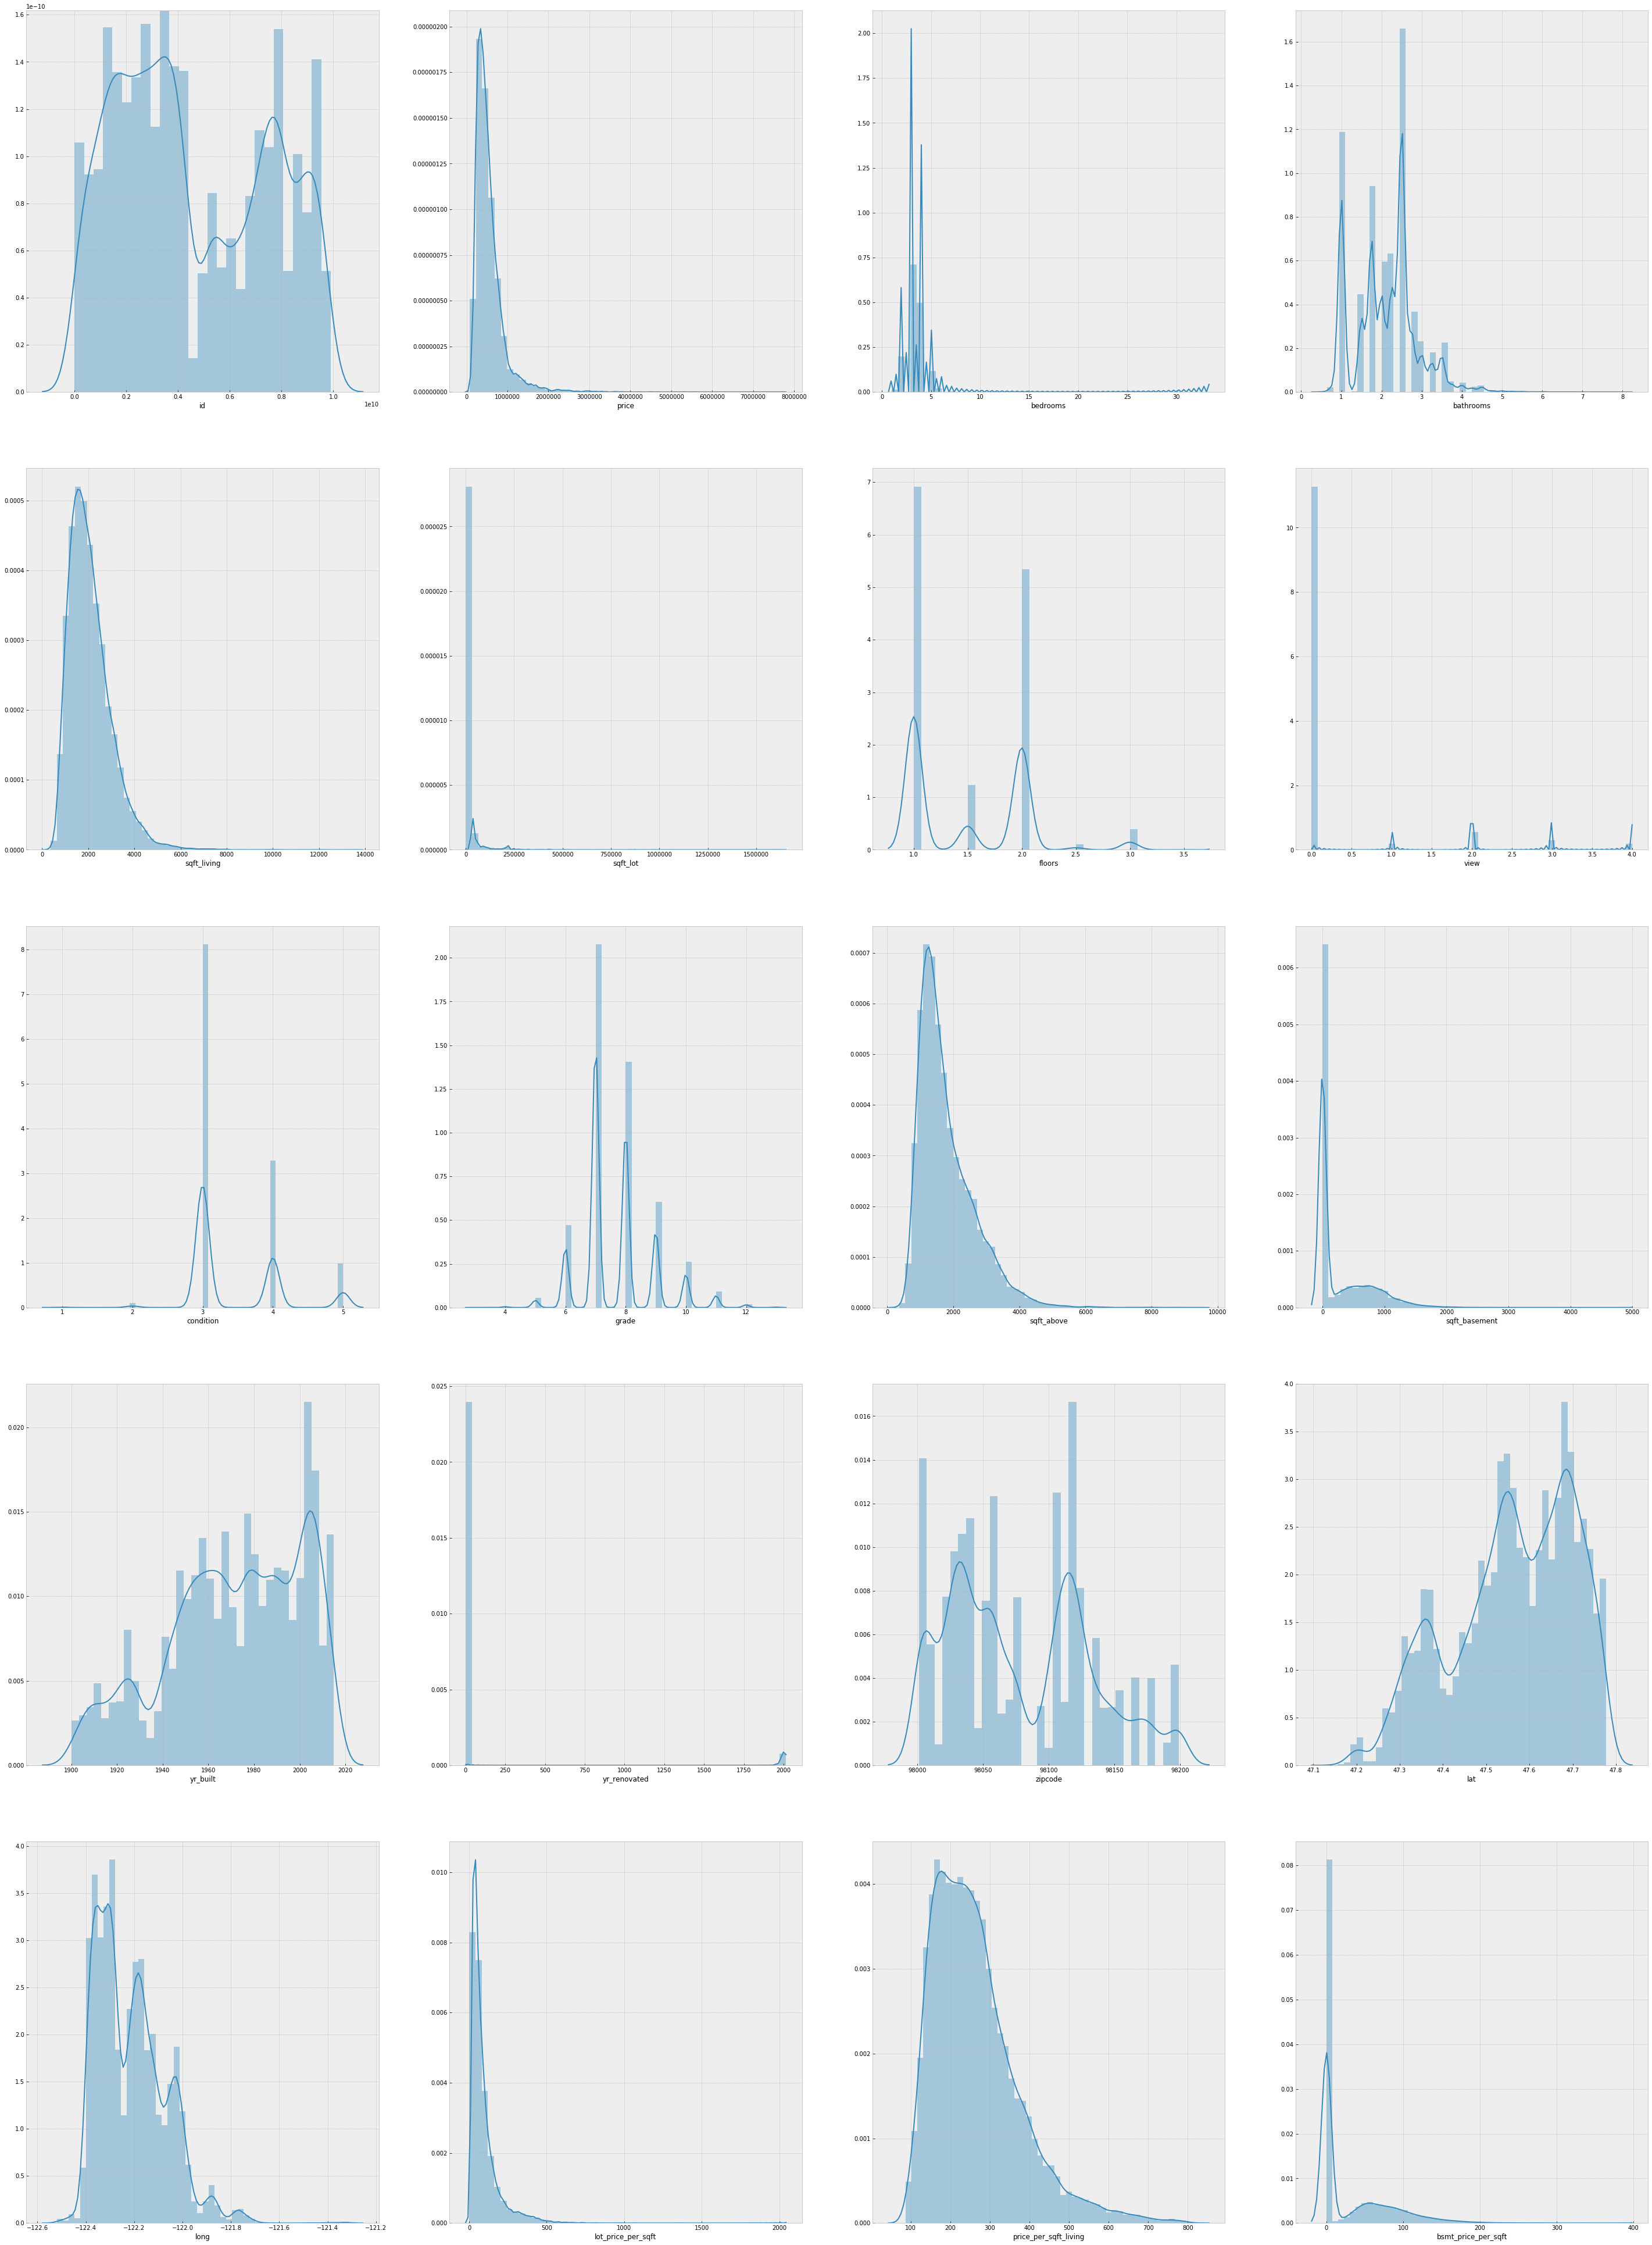

In [95]:
# seaborn distribution subplot function
def dist_plots(df):
    df = df.copy()
    for col in df.columns:
        df[col] = df[col].fillna(0) # convert NaN values to 0
    fig, axes = plt.subplots(int(len(df.columns)/4), 4, figsize=(50,70), squeeze=False) 
    for i, col in enumerate(df.columns):
        row = i//4
        column = i%4
        print(i)
        print(col)
        sns.distplot(df[col], ax=axes[row][column])
        # sns.distplot(col, label=str(col), ax=axes.flatten()[i])
        
dist_plots(df.loc[:,(df.dtypes == 'int64') | (df.dtypes == 'float64')])

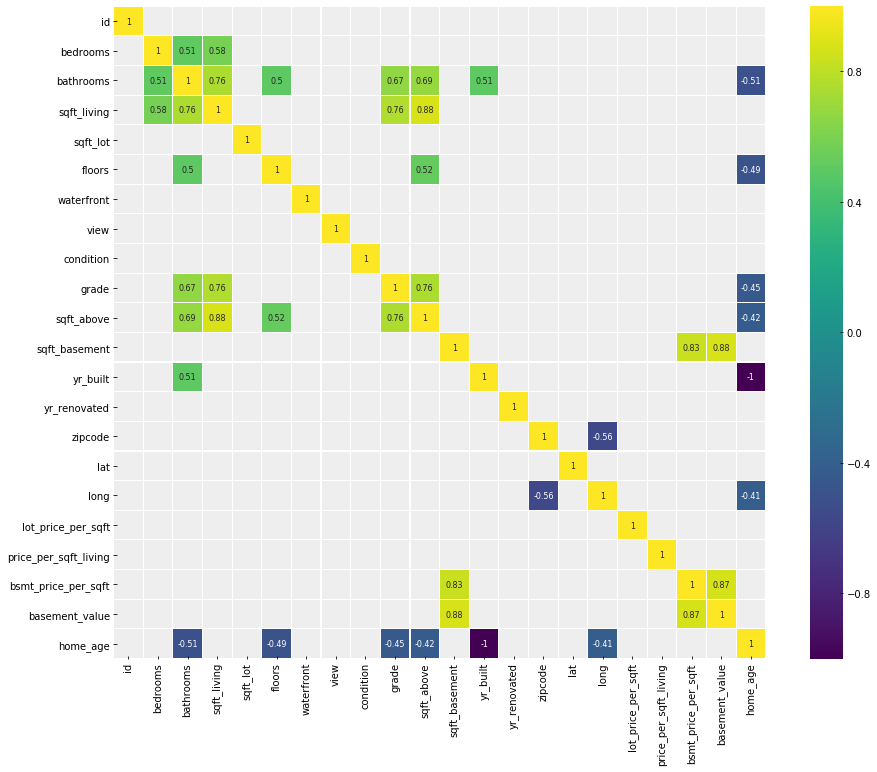

In [244]:
# feature to feature correlation
corr = df.drop('price', axis=1).corr() # We already examined 'price' correlations
plt.figure(figsize=(16, 12))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

> We're interested in the fact that there is no high correlation between 'sqft_living' and our engineered feature 'price_per_sqft_living'.
    - more on this later when we get into our Multiple Regression model

# 4. Baseline Regression Models  (Linear, Multiple)

> First, let's create a couple of simple Linear Regression models for home living sq footage and home age

In [189]:
df.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [190]:
# Linear Reg model for home living square footage
f = 'price~sqft_living'
sq_model = ols(formula=f, data=df).fit()
sq_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        10:36:00   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Nothing impressive here...

> The model gives us a pretty weak Coefficient of Determination (R^2 = 0.493) for independent variable 'sqft_living' to predict target dependent variable 'price'.  

> As the warning message insues, there might be strong multicollinearity, or other numerical problems for sqare foot of living space alone to predict Sale Price... other varialbes like the home's location may completely annul this independent variable

    - given our engineered feature, 'price_per_sqft_living', we can build a better model to more accurately predict a home's sales price based on its total square footage of living space, while indirectly considering other other factors like say, a given zipcode, or latitude and longitude coordinates  
    
    - We'll explore this further in a little while with a Multiple Regression model

> let's check how our general Regression assumptions measure up

In [ ]:
# Strong visualization showing direct correlation of sqare footage of living area and Sale Price

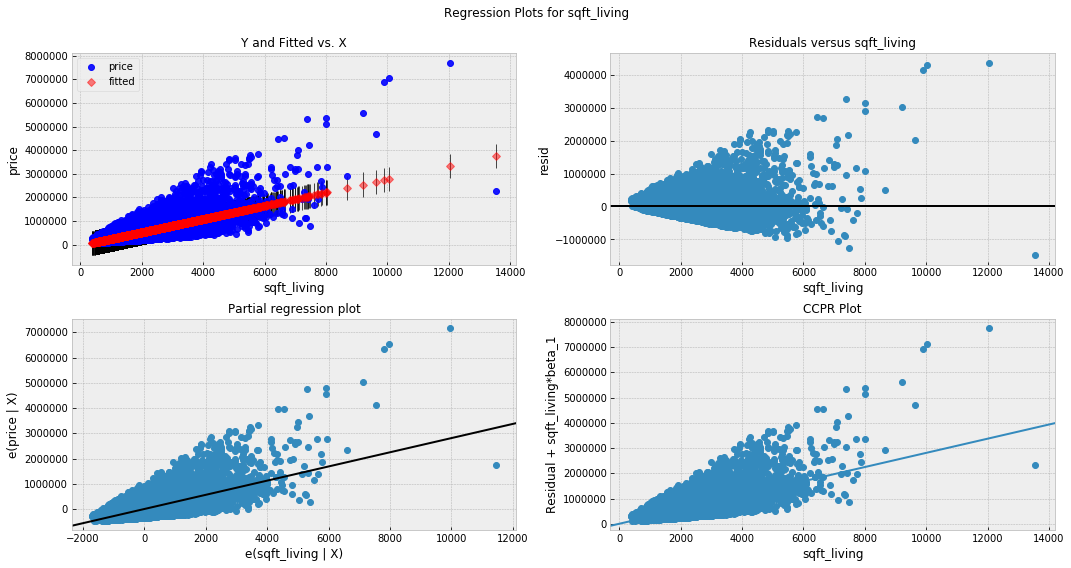

In [191]:
# assumption error plots
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(sq_model, "sqft_living", fig=fig)
plt.show()

**Y and Fitted vs. X** 
    * Though the graph plot is linear and there is correlation (one variable increases as the other increases), the variance in the predicted values is just a bit broad, which takes away from its predition power (eg: at sqft ~ 2000, we're priced all in between 500K-3M).  The confidence interval is very low.

**Residuals versus height** 
    * Here we have a cone-shaped pattern that indicates that we can assume heteroskedasticity, and a rather large variance in our model's errors versus the specified predictor variable

**Partial regression plot**
    * A simple partial regression plot doesn't show much difference from the fitted Price and Sq Footage plot.  It will be our job to find the right combination of independent variables for Multiple Regression analysis

**Component and Component Plus Residual (CCPR)** 
    * Again, same slope - we'll find the right combination of independent variables next.

> its time to create our Multiple Linear Regression model

In [61]:
df['price_per_sqft_living'].describe()

count    21597.000000
mean       264.143331
std        110.000058
min         87.590000
25%        182.290000
50%        244.640000
75%        318.330000
max        810.140000
Name: price_per_sqft_living, dtype: float64

In [247]:
predictors = sm.add_constant(df[['sqft_living', 'price_per_sqft_living', 'bathrooms']])
multi_model = sm.OLS(df['price'], predictors).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 5.306e+04
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        17:36:23   Log-Likelihood:            -2.8445e+05
No. Observations:               21597   AIC:                         5.689e+05
Df Residuals:                   21593   BIC:                         5.689e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.513e+05   3433.706   -189.669      0.000   -6.58e+05   -6.45e+05
sqft_living             297.4770      1.438    206.863      0.000     294.658     300.296
price_per_sqft_living  2089.6125      7.892    264.773      0.000    2074.143    2105.082
bathrooms              9811.1640   1716.769      5.715      0.000    6446.169    1.32e+04
==============================================================================
Omnibus:                    21741.343   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7289932.378
Skew:                           4.330   Prob(JB):                         0.00
Kurtosis:                      92.588   Cond. No.                     9.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ready to predict
> As we can see, our engineered feature 'price_per_sqft_living' has come to the rescue! (this feature can filter through location pricing and living sq footage range to give us a truer value for what a sq foot of living space is worth).  We add in 'bedrooms' and 'bathrooms' for good measure

#### We now have a high coefficient of determination (R^2) of 0.881 [meaning please]
 - with our R^2 this high, we have high confidence in error variance
 
#### Analyzing our coefficients  [meaning please]
 - our regression function becomes y = (6.5 * 10^5) + 297**x1** + 2089.6125**x2** + 9811.1640**x3**
 
#### P>|t| values [meaning please]
 - is less than 0.05





        > Now let's check our assumptions


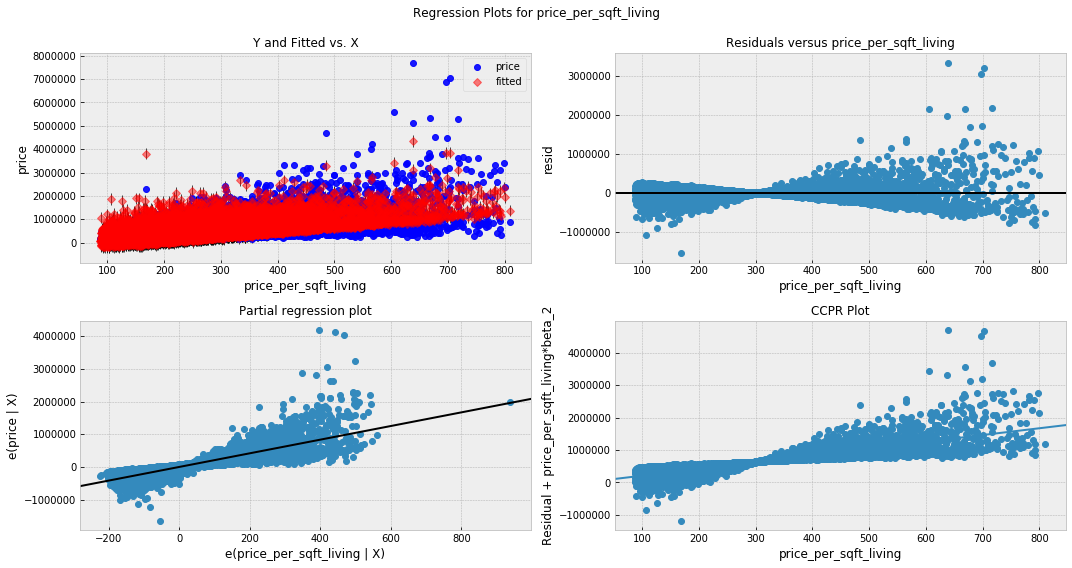

In [231]:
# we'll just use 'price_per_sqft_living' this time around, as it affects the greatest change
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(multi_model, 'price_per_sqft_living', fig=fig)
plt.show()

**Y and Fitted vs. X** 
    * linearity and correlation, much better fit especially in lower ranges (which is where most of the data sits.

**Residuals versus height** 
    * homoskedasticity

**Partial regression plot**
    * well fitter and accounting for outliers

**Component and Component Plus Residual (CCPR)** 
    * Elastic and resilient to additional independent variables

> Let's plot preditions against actual results

In [241]:

# X = sm.add_constant(df[['sqft_living', 'price_per_sqft_living', 'bedrooms', 'bathrooms']])
# y_pred = multi_model.predict(X)
# y_true = ?

# fig, ax = plt.subplots()
# ax.plot(x1, y, 'o', label="Data")
# ax.plot(x1, y_true, 'b-', label="True")
# ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
# ax.legend(loc="best");

SyntaxError: invalid syntax (<ipython-input-241-ad8239a30039>, line 4)

# 5. Model Testing/Training

> now we split our data and train/test our model on the subsets

# 6. Model Validation

> Great! we can now validate our model

# 7. Conclusion: Visualizations

> What are our key insights and take aways?